

Kristina Liu


BI 260 HW 3



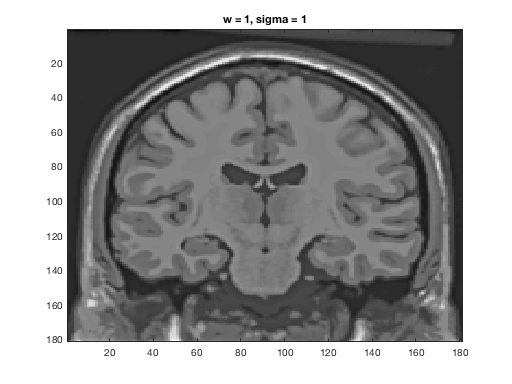

In [1]:
im_brain_w1 = BlurOrSharpen('brain.tif',1,2);
figure()
imagesc(im_brain_w1); colormap gray
title('w = 1, sigma = 1')


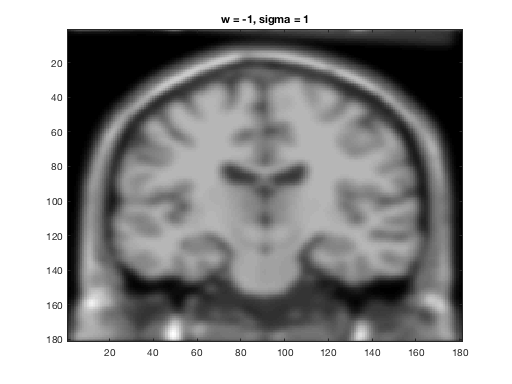

In [2]:
im_brain_wneg1 = BlurOrSharpen('brain.tif',-1,2);
figure()
imagesc(im_new_wneg1); colormap gray
title('w = -1, sigma = 1')


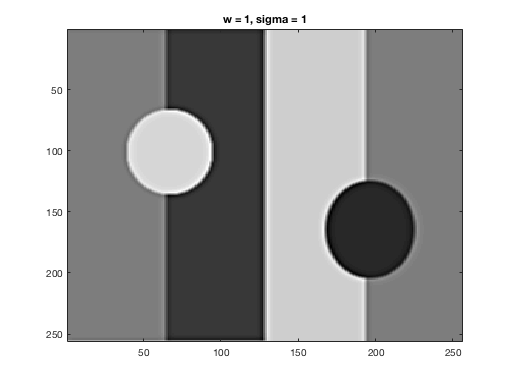

In [3]:
im_pattern_w1 = BlurOrSharpen('pattern.tif',1,2);
figure()
imagesc(im_pattern_w1); colormap gray
title('w = 1, sigma = 1')


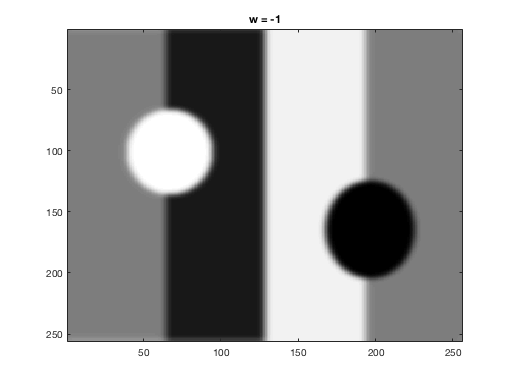

In [4]:
im_pattern_wneg1 = BlurOrSharpen('pattern.tif',-1,2);
figure()
imagesc(im_pattern_wneg1); colormap gray
title('w = -1')


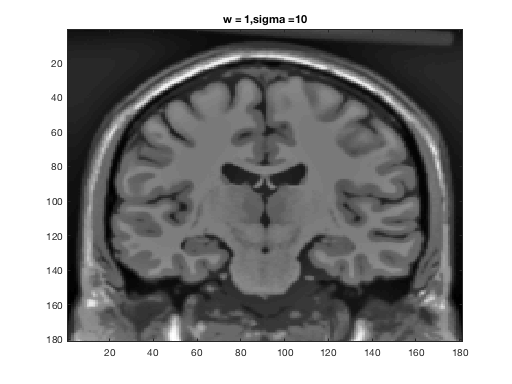

In [5]:
im_new_sigma10 = BlurOrSharpen('brain.tif',1,10);
figure()
imagesc(im_new_sigma10); colormap gray
title('w = 1,sigma =10')


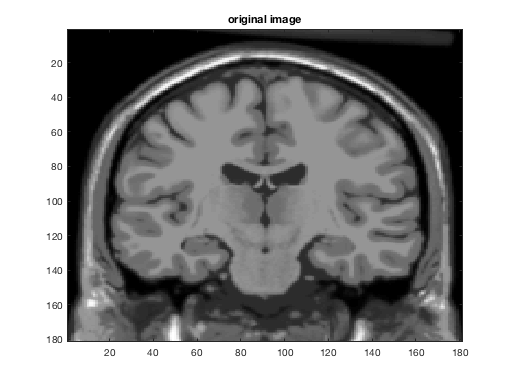

In [6]:
og_brain = imread('brain.tif');
figure()
imagesc(og_brain); colormap gray
title('original image')


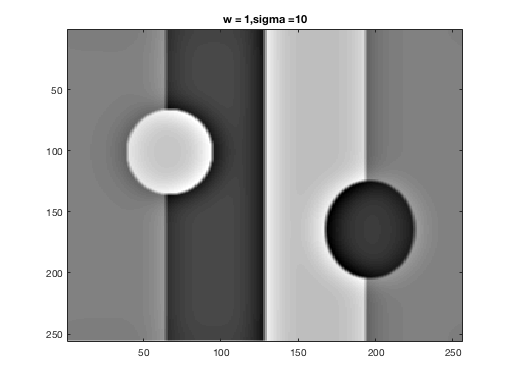

In [7]:
figure()
im_new_sigma10 = BlurOrSharpen('pattern.tif',1,10);
figure()
imagesc(im_new_sigma10); colormap gray
title('w = 1,sigma =10')


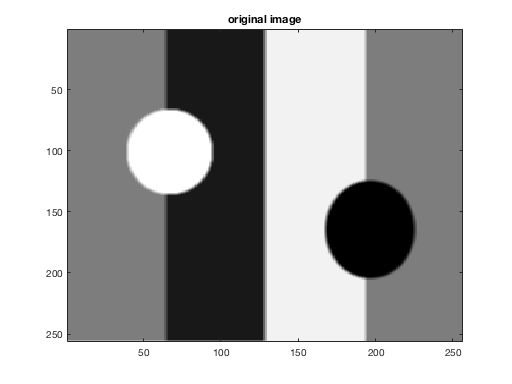

In [8]:
figure()
og_pattern = imread('pattern.tif');
imagesc(og_pattern); colormap gray
title('original image')


1) w of \-1 gives most blurring. \-1 cancels out the sharpening portion of the equation, leaving only the blurred.


2)  w of 1 gives most sharpening. You are creating an image from 2image \- blurred image, which gives you back an image that greatly reduces the effect of the blurring.


3) You get a somewhat sharpened image on the brain image even when sigma is 10. When sigma is smaller, your sharpening effect is even larger.


4) You have these ring artifacts in the resulting image. These are probably from the gaussian that could not be  sharpened. The image is much simpler with large areas that aren't changing that is bigger than the radius of the gaussian kernal.


In [9]:
spine_blurred = GaussianBlurr('neck_sagt2_im8.tif',2);

In [10]:
function blurred_im = GaussianBlurr(name,sigma)
og_im = imread(name);
wrapped_im = repmat(og_im,3);
radius = 3*sigma;
kernal = [-radius:radius];
g = (1/sigma*sqrt(2*pi))*exp(-(kernal.^2)/(2*sigma^2));
gx = (1/sum(g)).*g;
gy = gx';
gx_blurr = conv2(wrapped_im,gx);
gy_blurr = conv2(gx_blurr,gy);
blurred_im = zeros(length(og_im));
diff = length(gy_blurr)-length(wrapped_im);
for i = 1:size(og_im,1)
    for j = 1:size(og_im,2)
        blurred_im(i,j) = gy_blurr(i+(1/3)*length(wrapped_im)+(1/2)*diff,j+(1/3)*length(wrapped_im)+(1/2)*diff);
    end
end
end
function im_new=BlurOrSharpen(name,w,sigma)
blurred_im = GaussianBlurr(name,sigma);
og_im = imread(name);
im_new = (1+w).*og_im - w.*blurred_im;
end